In [1]:
%matplotlib inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [2]:
re_unemp_california = pd.read_csv('data/new_cali.csv')
re_unemp_california['state'] = "California"
re_unemp_florida = pd.read_csv('data/new_Florida.csv')
re_unemp_florida['state'] = "Florida"
re_unemp_newyork = pd.read_csv('data/newyork.csv')
re_unemp_newyork['state'] = "New York"
re_unemp_texas = pd.read_csv('data/Texas.csv')
re_unemp_texas['state'] = "Texas"

re_ca_fl = re_unemp_california.merge(re_unemp_florida, how='outer') 
re_cal_fl_ny = re_ca_fl.merge(re_unemp_newyork, how='outer')
re_unemp = re_cal_fl_ny.merge(re_unemp_texas, how='outer')

re_unemp.head()

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid,state,date
0,2010,Jan,15997913,2216607,12.2,291655.4313,0,California,NaN
1,2010,Feb,16028580,2233503,12.2,291055.6660,0,California,NaN
2,2010,Mar,16061366,2242732,12.3,291133.4774,0,California,NaN
3,2010,Apr,16090440,2245213,12.2,291726.8098,0,California,NaN
4,2010,May,16112833,2240855,12.2,292800.8509,0,California,NaN


In [3]:
final = re_unemp.drop(columns=['date'])
final = final.sample(n=300, random_state=1)
final

,Year,Period,employment,unemployment,unemployment rate,single_home_avg_prices,is_covid,state
304,2014,Jul,8918415,593066,6.2,223457.83710,0,New York
340,2017,Jul,9117049,455610,4.8,249358.62320,0,New York
47,2013,Dec,17081350,1542603,8.3,335938.04480,0,California
67,2015,Aug,17686845,1127776,6.0,377214.39650,0,California
479,2018,Sep,13334935,515287,3.7,136909.16000,0,Texas
...,...,...,...,...,...,...,...,...
484,2019,Feb,13437974,501330,3.6,140125.20960,0,Texas
410,2012,Dec,11941642,827320,6.5,96611.37082,0,Texas
48,2014,Jan,17086089,1517461,8.2,338605.50290,0,California
473,2018,Mar,13211042,551955,4.0,133050.53670,0,Texas


In [4]:
X = re_unemp[["employment", "unemployment", "is_covid"]]
y = re_unemp["single_home_avg_prices"].values.reshape(-1, 1)
print(X.shape, y.shape)

(500, 3) (500, 1)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])

In [7]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4444038502411758
Testing Score: 0.5743699426615116


Text(0.5, 1.0, 'Residual Plot')

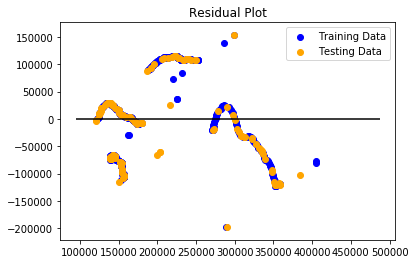

In [8]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

TypeError: '(slice(None, None, None), 0)' is an invalid key

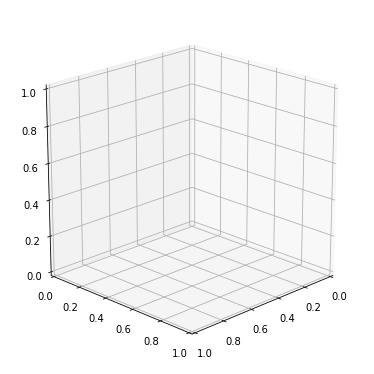

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(5, 5))
axes = Axes3D(fig, elev=20, azim=45)
axes.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_test, cmap=plt.cm.get_cmap("Spectral"))
plt.show()